# Notebook_4 - The SEIR Model

### Import needed packages

In [23]:
import numpy as np
import matplotlib.pyplot as plt
# let's set things up so we have nice font sizes
plt.rcParams.update({'font.size': 12})

### Goals

We want to explore numerical solutions to the SEIR Model.

# An SEIR Model
I've implemented the SEIR equations in a simple (Euler) method. 

**Inputs**: 
- initial conditions (S0,E0,I0,R0) 
- params (alpha, beta, gamma)
- t a vector of evenly spaced times that you want to integrate over

**Outputs**:
- A tuple of (S,E,I,R) at the time points in t

In [46]:
def SEIR(initial_conditions, params, t):
    '''
    This function forward integrates a basic SEIR model and returns S,E,I,R arrays.
    
    initial_conditions, a 4-tuple (S0, E0, I0, R0) with initial counts in compartments
    params, a 4-tuple (alpha,beta,gamma) with parameters:
        alpha, E->I symptom onset rate
        beta, infection rate per S-I contact
        gamma, I->R recovery rate
        rho, social distancing parameter 0≤rho≤1
    t, an array of timepoints, ASSUMED TO BE EQUALLY SPACED. 
    
    Returns a numpy array of S, E, I, and R arrays. 
    '''
    S0, E0, I0, R0 = initial_conditions
    S, E, I, R = [S0], [E0], [I0], [R0]
    alpha, beta, gamma, rho = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        St = S[-1] - (beta*S[-1]*rho*I[-1])*dt
        Et = E[-1] + (beta*S[-1]*rho*I[-1] - alpha*E[-1])*dt
        It = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        Rt = R[-1] + (gamma*I[-1])*dt
        S.append(St)
        E.append(Et)
        I.append(It)
        R.append(Rt)
    return S, E, I, R

In [56]:
# Population size
N=1000

# Timesteps in days
t_max = 180
dt = 0.1
t = np.linspace(0, t_max, int(t_max/dt) + 1)

# SEIR Parameters
# Rate at which E -> I
alpha = 0.2
# Infectiousness
beta = 1
# Rate at which I -> R
gamma = 0.4
rho = 1
params = alpha, beta, gamma, rho

rho = 0.8
params_socdist = alpha, beta, gamma, rho

In [57]:
# Initial Conditions
S0=1 - 1/N
E0=0
I0=1/N
R0=0

# Run the simulation
results = SEIR((S0,E0,I0,R0), params, t)
results_socdist = SEIR((S0,E0,I0,R0), params_socdist, t)

Text(0, 0.5, 'population fraction')

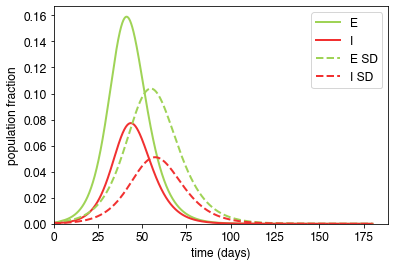

In [58]:
colors = {
    'S':'#22223B',
    'E':'#9FD356',
    'I':'#F13030',
    'R':'#FFA737'}

# Set up the axes
fig, ax = plt.subplots(nrows=1,ncols=1)
S,E,I,R = results
S,E_socdist,I_socdist,R = results_socdist
# CODE TO PLOT GOES HERE.
# ax.plot(t,S,label='S',color=colors['S'])
ax.plot(t,E,label='E',color=colors['E'],linewidth=2)
ax.plot(t,I,label='I',color=colors['I'],linewidth=2)

ax.plot(t,E_socdist,label='E SD',color=colors['E'],linewidth=2,linestyle='--')
ax.plot(t,I_socdist,label='I SD',color=colors['I'],linewidth=2,linestyle='--')
# ax.plot(t,R,label='R',color=colors['R'])

# Make the plot attractive
ax.legend(loc='best')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_xlabel('time (days)')
ax.set_ylabel('population fraction')

Use the code above to explore a few questions:

1. In the SIR model, we get an epidemic when $R_0=\frac{\beta}{\gamma}$ is $>1$. Does that hold here or not? Conduct some numerical experiments to see whether you think this $R_0$ holds. 

2. With all other parameters fixed, what effect does changing $\alpha$ have on the epidemic?  Explain this result in terms of what you know $\alpha$ does. 

3. We know that social distancing is meant to "flatten the curve". How could social distancing be incorporated into this model?

4. Suppose that hospital ICU beds will be totally taken up if more than 10% of the population is infectious at once. How much social distancing would be required if $\alpha = 0.2$, $\beta = 1$, and $\gamma=0.4$?

$$S \to E$$

Key determinants of $\beta$:
1. Rate of contact between $S$ and $I$ people.
2. The probability that the disease spreads, per contact.

Introducing the social contact parameter: $\rho$

$\rho=1$ is when we have typical contact patterns. 

$\rho=<1$ social distancing.
